# Image Manipulation

In [1]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
import requests
from io import BytesIO
url = 'https://nationalinterest.org/sites/default/files/styles/desktop__1260_/public/main_images/F-35A_flight_%28cropped%29%20%281%29.jpg?itok=6Xbbi8Ee'
#url = 'X4DczgpV6ldgR3aYPxsdvGHdFuba5MWSUYnFInvHXoN5Gl7XESETBxGKeqTrZeQ5eF+s3KL5lBPQX8+cq46TMtntEdgouTYTlxfEVXRdT8v7zJr4hmNybx44W+llnJ478VxTkmnid/QcpmO5Op1hC3hVJrJIyttVGC06koR2VBu2X4feP6LT0DRTGOkQmdzk0VlkVZJaF08IW6VIUxWPKG14CQshRUTr8IzPac71LmMq3hf8ARP8AE1byjgCBmtoIjvaTtcg1Hla66/sSl6ssptaFnDi3LbSFYq+MmLosabBTZiptM7dKkPTYMMwIIOxGo9I4HO88nwriRpMVYHLfvLzB5svj1HOetohWW6m4IuCNplauQ6CQm2kJPSACZ2tJC5SZPZw1a6r7zAeZiLiFYEhgQN9dvOT02Hx/FCjicK+ysXpt5Nlt8zf0lVTtMr1XpUdQg7z/ANROiqPQzK7d1zVVMuwfu+Nxv9JZ2I4GlJajVCL5lYjYajQE89j8ZcknqLbfGzgMC1Q53vb5t/abFSolNdbKOQ/QTPxPFgNKYv4nb0EzKlQsbkkmFly9G5j41WxpfZhTS2595uXdE43ohz3Act/eY3Y/aDDYW51+E5O12GxHs6SUL/xGZGVdGPcLixvoLI9x5Q5OQu3tdWKBCgU2C3/EBcgW3UbE+e3QxsRjWPdvptpz85hdl3Z6Kg/hAHiLDL8dLek3VoKNzaMlKrrHWgTOmnhnY91dOraD56/ATxHGO1tZKzUhTVClXIwJLEgHrpYHr4xfQ+a9hZV3NpdRou3uofNu6PnqfQS7s1iErUErKiqzXDWuSGUlWGY67iawkXNpMHyfinbGuKuU0/ZhKih1N8xS+oB/Dfa9uYM+h8GelVopVpKFDrfXVgdirNuSCCPSeU7T9kWxGOY58i1kGR2GZTWVQvsjzW6pmB159Jr9ga1sJ7PKA9KrUpPa1iynVrje9xrDLzYx909MzQCQCFVv5T1LXnyDRp84ztfy/esjE7cpQ9TkJHtX4epVA0E5muZYKfWOqQ3INWq6dOWObaRybCUMZG9tJNFJtKmPORKoYsAblTZvA2DW+BESrpHOgqCWqJXS18o7tyAiyvTkCnU1sBOym0ppJaXCY5VcYnabhd/4yDUe+BzH83mJwcE4saZynVCdQOX9S/cT1wF54zjWBFGr3SLHvAX1XXmOl+cid4dmuvZJUDAFTcHYjmJzY3GhBoQX2A6eJnnMDiny5QTYnYaeZ8P7TqoZdWOo2A+8UxO5qaxJuSbnxlNBdL9Y1c8pE2lswqJccjYgi/W4F/QEmAgxmeRFvEZqSk7S7F16eHXPUNr7D8THoo+/KaPD8LcXtbrcdDb1lXaTgiYimim6lainMBmIBOVrjpY3P5fCZ3L8XMf03ZfilPE0vaJYNdrqSMyjMyrccrhbzXNMNoSRzDC11PJluNCJ5TsJwr2BxAJuyuEuNFYC+oB1uGzD0nrhIvK0nY4qnB6aOwXugECykm4yKdSdb/W9543/ABG4c4fCvRDd19QCd1dGDG515/Ce+C2/fhb6ATL7SYfPSB/ldT6E5f8AtD66PnUa4Gs8H2o7HrVqVqg9o1WsR7BUXu5woBSqdlVj3s5KgW9D7qie4CdyB9JfhqwU973SRfcH4jW0WN1TynGXwWk6UKaVPfRQjWN9V7u/PadsjIqvVC3t7QkXNwMyqzZedixY69TytK2cXy+Fz5CF9EvAxOEp1Vy1hdCVNvFSCDpruJZxHDmmlM00TJlyhUsthYZd7DYfSVGrcZjp0nMtcFPZFSyBsw1Bsdbix5a6a6dI8fOpy93HcojMYROeq1/3vPS9ri8B6l9BDTS0KJLQIW/hyAqQMZGaU1GNpmsajc5WlQSnEPyGsFJdvnK+eDfXn+x9Uk4gE6+0zfEsPtN0KTPMdk3ticQvXMf/ABqW/wC09VUrBB3iB9fhMsMtYrynQ9oBpCnhOSm7VD3RYdec1UpgDwHWFygkFFlqrKMNiA5IXlz/AE+BnSw0ty+sxyrSRiYzijElaegva41Jnl+I9ncY9cYiiMx0VkqEKCvMBjy5+evhPoKIqC9lUegAmXj+M/hp+rG/y/WGOV/5hWT9rGqUSh9mSA3uk30GvX1uZ0VTSRcqXc7ZzovjkX7n4CDCqmbNVuV1Nhu1up8yPnDicZdaiBQFeoHXrTsipZbaWIQX8TLk0zrh3kcRlEXEDT0jtCjMQ4Btt13vt6zvw6l6ooobG2aow3ROg/qa4HgDeZdX/V12UC/oLzT7ArmatUO/dHqxZj9BMs7pphNvWgWFhsNB5coVtzFxzHWS0Myag9BFeyWy+zp5VCgBbZhbTla2n6wgSKv7/fmYSIWiQpkIvodYbQpJWjbxSIZIgUL5nzJJPLUnU7RfZgX5k7/pLjoPGcGIq7gH4SokmKe58PvKKtW0N9ydB+9hObF8jLia2WqX/e8CrGVYQJ6Vv9OKQQJj9ouJtSAVTZ21DW0AB28Sdpr3mZx7B+2pkD3l7y/cesyyXD8M4kKyX2YaOvQ9fKW1XsP3pPE4LFNTYMvvDS3Jh/KZ7LB10qqHG3MHcHmD4xY5f2diHQXMsp8pl43HanLy58vSc+Fx9W97mx5Gx+0MsxI8fT4t/lcXWqWJ71ZbDfVyRv4qJ6fgODquoqVrl3szDp0QdAo+d5jLwX+I9RyCzO5HOwLE36X5z0LV3fujQdB9+sxi61qVYDuoMxG5v3V8WaUVFaoSWcZBuRcL6X3hwPDdi3wnluMUMXXxGViKVKm5K290hWIUgA3YkC+sLdh6Hstj6eIq1qtIH2dNVpBm0zG5diByFsk1MXxVV0XvHry/vPP4OkKVP2dPRb3IGmZrAZjbnoJYBF8n9c4sxGJZzdjfw5DyE5XbWWEdZxYiuEVnbYfsD1Nh6y8UV1rWHu3W52BYBiP6QTeVMZ4ulxZqlfM1tW25AbAW6WnqOF4vMjId11HlsQPDwjz1LwYy6aFOXPhjcAjS4v5XnEtXr+xMvH9uGoMoqUlqU2GmU5aigcje4b5TPK6VJto8cpBPaupFmuBbkGmp/h+v8GqetW3wRf8A6nkuKdoqeJVfYhgm5zAA5hyNidB957jsRRy4UE/jd2+eUf8ArMsrutcZpuyASGMBIWkWNEJiNCYToIAJGOsKYCEMBqdgLmCDFU81Nl2zAiKCs7HYoseg29bX1nHUqkDTeVNYa32Fod/AdZtMdI25BRZmGYkn96WmiVNhfWwi0eo3hxL2t87R27pabUVjITA2ms7XLoGaUVH1hLSiqhINja/0j1ovXm+M4UCqSux105Hn+suwVFrE3IFu90J5DxM1KnDVy+93rXFyANCNSTy1HxmbXbL3QQbcwNPS+pnPfVixvpylhbScjVgguSB4nQfONRq5lzMbKLkk7ADnEF+HwxY2Uf2k49xD/JU1Kpmd81mPurYAm/XfadXZzHCsagVbU0sATuxI6choT/uE0uM4NamHql1VgqE3Zc+T+pRvewP9hJ3tetPI9lOK4irRc1GLXqNY8/LTYbaTUWn1M7uEdnBRpIhbQKL2vqbXY6+N5TwXBPXwF6mlaqlSzKGTKGLCmQCbqbZTrrrFvQ+bXLicTSpe+6r+ZgPgNzOTi3GloU6TlWZaoYoRYKQtt76jcW01nl+yvAXq8QajiFv7IE1e9cGwItmB17x3B69J9H7Sdn6eJw4ohWBpi9IJbRghVVsdMpuBqR5i0VpzGPHcA4zWxdY/wQtEXzMAxyWS4u21yR63nN2vxPs0UX0LcjvYcj85qcB4KaPC6qVTZqzkEowIKhgoysN1IDajkZ57thWRv4CgZqKqzkcs5Ay+gyf+UcvBZ1gULhg2tvzcp6ngtYe1UAnXMDfoQTrPNol1Fhc6Acz0E9T2bwDJT9vWUhluiKQQc2xJB1FovYrw/F8WooWUWf3WObcHe4+OoPpPI8RwVWoRlR6jsdFRWYgeQBsNp6HihuQPM/v5z2X+HeAy06lY/jbKv5V3+JP/ABk5ZdGM48h2P7EYst/HpmjTJBuzLm8QFBJB23tPrFGkEUKosFAAHQDQS2CQtBIxkMixHAacqvmfwH1nS0FoHpBEMdhyimSoRE4jVyp56DzN/sDGjOiutm1invSrzbUwOt77efSJTpZja/MaEXvfYW5T0S4OmNl/frEXA0wxOX0ubfCbf+kRpmUaYTuje/w6x66XPWaVfCLugANtBsLzjxStcA20HLaTvZuwSmq0eobbnzmdiOJKPd7x+U9HcjjroYgbmwE4sTxMDRBc9T9hM/EYhmOp/QRKWl2INh9ZGWez07aoQKS7l3KEi3uh8y2Uema522nAtOMdTOhqNludplaemPxWxUJYEsdBva3PzmRj+Is5FJdVUhRb8TbXPWx2nVx2uEdypJ1yofAaFh++cfsRw72lcOR3afe/3fh+59Jnld8aYzXXt+BcNFCkqc92PVjv+npNQjS3I2v4gG9viBAojR1SnHXNNwL3IIHPVtL/ADnVgqIXIv4QAvoBaKsjSDceDogPWqZiwdx7PMNVpqLWH9JbMwFud9bzsSuFVyRm7hsv8zEgKL8tWHxlRMBjJk4vhrLh0p0hm9kLhSfeIBsMx2Fza2wHlPlOF7N4xMS3+YpVB7VagapYMuY9+5YEgarpc72n22c/FEvQqj+hvkLwGnhOzXZf2TB3fO170wvdsyjMSLnvEWvbwmlxEW0+s1eH1nNNFPIaaddT6zg4zRFib2sCZUmkXdeOxIL1Mq6kkKB49PiZ9b4dgxRpJSH4FA8zzPqbn1nzzsPgva4kOfdp3c/mOij46/7Z9LvMb1tEMEkkQSSGBoqqBIN5JOURlYxYYsRjaESCGAKYytfSIYFgS9ehlGLoXt16xllqHkYeBh8VJayg2G5mLjMZh6H+rVVSRcC+pB2IA1toZucXwIq0zRI/1TlY22Tdzf8AKCPUTE7b9lVxVfDKC1NihzWW6mjTYaA/hbvkDfflO7O9ckjgxHaOiELKlTKUzIxXKH1I7t9T7rfCYPBMYalYM3vcyDYm52/LytNPt3TUMKVlCUxTpotiSAKeckWOg7yja95ldmrXC5dQdCOi738JrhqY1GXr1S4kZjewAJ9AJmYvt0lF1V6eekb+7769CQdGv00t4zO4zj2yGnpZmZtLbHx3108NJRwPs6MY/s2zBBZqjgjN4AEg2J+l5y2/jaT9TFYtsVVDKNWICKuthyA6z6V2Y4R/l6IU++xzP59PQfeLwDs1h8IP4KEH+ZmLN5Anb0m4BFrSi2khMkNmhlbNGYyomEgowkwQgQoECGol1I6gj5SASwSLTYXDDcTzHbDiFv4anVt/Bf77fGetxOCakzPTUsGDdwbhrfhvyJ+H0weE9kaj1TXxRAN7hAQ3lc7WA5SssucTMetTsPw0UcPmsQ1RizX5W0UfDX1nooAgAAEMzWghkAkMR6EQGEQExKKRA8YRREZTFtrHMW0AkMgEJgCt9pAIIYEYCQSRbQCFRe/O1oqp3ix1JsPJRfKo8Bf1JJjQmdrn0+e9q+GVKuOtl0KC7gaBQSBf+q3LnEPDqeFRglxmJLMxBcrfQNYADTpPbllzsxQG2m51GW2vXUtPBds8SA2UH3tT1Avt++km5VMx6wCjVqgCi7MQFH0E+o9n+FLh6QQand2/mb9BsJh9ieCZB7dx3mHcH8qn8Xmfp5z2SLJxmurveLEEeAQxVQRSYxMpdooAYyARVaOZRJaMBABHUSKoVEaGBpJhHUc4oEZjEC2htIBHCxU4WSEyARVQGKZCYsRm5QESSGIwMFpI0CJJC0kAQyLI0NPaMjGRICYbRAt4rNFJiEzukc9rF4zxNcPRZ23LMAOZNzoJ5XgHBqmKqe2rDu5g2o0bXYeGk9niOFUajh6iByNg1yo6kLteaNNZOWH9iU1NZcBIgjybVRFEjGQxGcD97STLUac1Sp03iZix8PrL6Omptf6TTWk72lIdZYICLwzO1UOksEVBGk1SSCQwxBJBIBDaIDTEZjIIJNXAtI0JiMYjIxkWS0YxGWAmEwAQCCGAyAwCGAyEyGBEbeOIgjmMg5x7xUj2ioc4PP4SljGeIJ6EjlMol6LEpS9JnlVYwRDAYrnSQtTia9tBv9B1nMX0t1nOGJuTrdp0W+gmvzIz3sabcucspm5lQ931l1BbL++knJUXA6Q0xEbcectWZVZrwiKsLfeIzKIZBCu8QG0JkHORpKoF4ZBA0RgTFhixGdYpjDb1iNJMsMghjBTJIJGgCyGESCBFhMh3hjSZYZIYjf/Z'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.asarray(img)

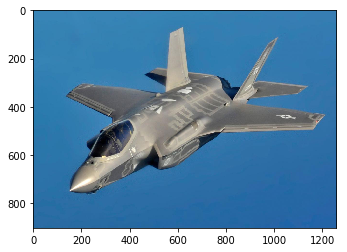

In [3]:
# Read with matplotlib and display image
plt.imshow(img)

In [4]:
img.shape

(903, 1260, 3)

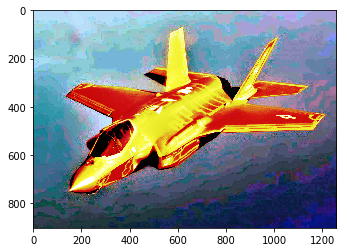

In [5]:
# Convert the numpy array to PIL package format to use it's function
img_pil = Image.fromarray(np.uint8(img))
img_pil = ImageOps.equalize(img_pil)
plt.imshow(img_pil)


# Could also crop, refit to a certain image size, flip and rotate (useful for image augmentation)

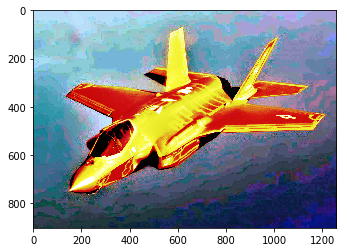

In [6]:
# Back to PIL equalized numpy array
img2 = np.asarray(img_pil)
plt.imshow(img2)

In [7]:
#Histogram data exploration

(array([ 31154., 578472., 333936., 198014., 881909., 307962., 839049.,
        229145.,   9424.,   4275.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

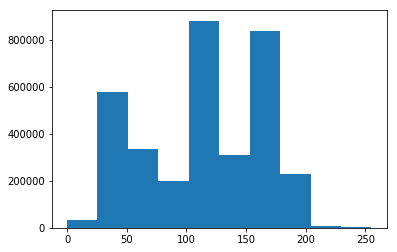

In [8]:
# Original image read from file as numpy (ravel flattens array)
plt.hist(img.ravel())

(array([382336., 342079., 376609., 350487., 267457., 360100., 365027.,
        283068., 382637., 303540.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

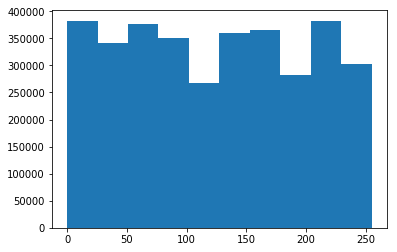

In [9]:
# A look at the equalized image
plt.hist(img2.ravel())

In [10]:
# Save equalized as numpy binary file - it adds extension .npy 
# (it's fast i/o)
np.save('my_saved_img', img2)

In [11]:
# Look at my directory with an os command


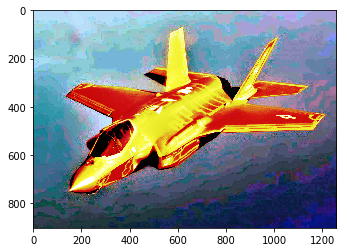

In [12]:
# Load equalized image back up for sanity check
img2 = np.load('my_saved_img.npy')
plt.imshow(img2)

In [13]:
# How many dimenions is this image array?
print(img2)

[[[183 221 248]
  [183 221 248]
  [183 221 248]
  ...
  [165 161 216]
  [165 161 216]
  [165 161 216]]

 [[183 221 248]
  [183 221 248]
  [183 221 248]
  ...
  [165 161 216]
  [165 161 216]
  [165 161 216]]

 [[183 221 248]
  [183 221 248]
  [183 221 248]
  ...
  [165 161 216]
  [165 161 216]
  [165 161 216]]

 ...

 [[ 43  56  68]
  [ 43  56  68]
  [ 43  56  68]
  ...
  [ 16  18 112]
  [ 16  18 112]
  [ 16  18 112]]

 [[ 43  56  68]
  [ 43  56  68]
  [ 43  56  68]
  ...
  [ 16  18 112]
  [ 16  18 112]
  [ 16  18 112]]

 [[ 43  56  68]
  [ 43  56  68]
  [ 43  56  68]
  ...
  [ 16  18 112]
  [ 16  18 112]
  [ 16  18 112]]]


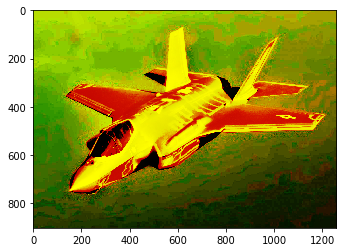

In [14]:
# A few more things in numpy

# Remove the Blue channel from equalized image, channel 1
imgmod = img2.copy()
imgmod[:,:,2] = 0
plt.imshow(imgmod)

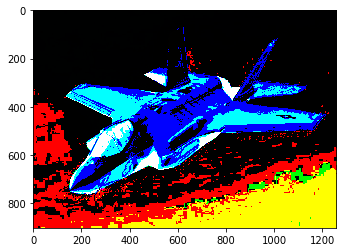

In [15]:
# Subtract the mean and divide by the std dev from all values
# using histogram equalized image
img2_norm = img2.copy()
meanval = np.mean(img2_norm.ravel())
stdval = np.std(img2_norm.ravel())
img2_norm = (img2_norm - meanval) / stdval
plt.imshow(np.uint8(img2_norm))

# Now try doing this per channel instead or over multiple images 
# (where you'd standardize per pixel accross images rather than 
# on all pixels of one image or within an image)

(array([2688925.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  724415.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

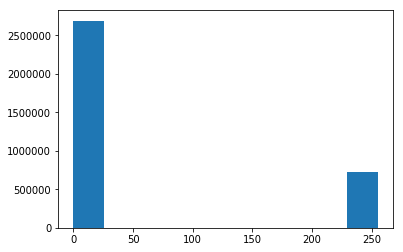

In [16]:
plt.hist(np.uint8(img2_norm.ravel(), bins=50))

In [17]:
print(img.shape)
print(min(img.ravel()))
print(max(img.ravel()))
print(np.mean(img.ravel()))

(903, 1260, 3)
0
255
114.51952750092285


In [18]:
# Remove values above a threshhold from original image
img_test = img.copy()
img_test[img[:] > 240] = 0

240

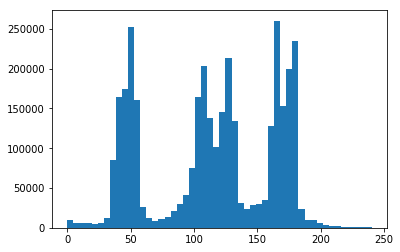

In [19]:
# Original image with removed values
plt.hist(img_test.ravel(), bins=50)
max(img_test.ravel())

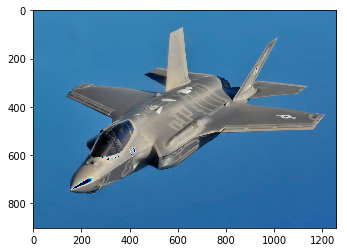

In [20]:
# In matplotlib 0 apears black, 1 appears white and 255 appears black
# Original image with removed values visualized
plt.imshow(np.uint8(img_test))

In [21]:
# Read with a different library called OpenCV
img_cv2 = cv2.imread('61wkFih-xuL._SL1200_.jpg')